In [26]:
import pandas as pd
import numpy as np

In [27]:
df=pd.read_csv('Cancer1.csv')
df.head()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  228 non-null    int64  
 1   inst        227 non-null    float64
 2   time        228 non-null    int64  
 3   status      228 non-null    int64  
 4   age         228 non-null    int64  
 5   sex         228 non-null    int64  
 6   ph.ecog     227 non-null    float64
 7   ph.karno    227 non-null    float64
 8   pat.karno   225 non-null    float64
 9   meal.cal    181 non-null    float64
 10  wt.loss     214 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 19.7 KB


In [29]:
## checking null values
df.isnull().sum()

Unnamed: 0     0
inst           1
time           0
status         0
age            0
sex            0
ph.ecog        1
ph.karno       1
pat.karno      3
meal.cal      47
wt.loss       14
dtype: int64

In [30]:
# Looking at the rows with null values
df[df.isnull().any(axis=1)]

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0
11,12,16.0,654,2,68,2,2.0,70.0,70.0,NaN,23.0
12,13,11.0,728,2,68,2,1.0,90.0,90.0,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...
213,214,11.0,92,1,64,2,2.0,70.0,100.0,NaN,31.0
214,215,11.0,13,2,65,1,1.0,80.0,90.0,NaN,10.0
216,217,13.0,192,1,41,2,1.0,90.0,80.0,NaN,-10.0
222,223,1.0,116,2,76,1,1.0,80.0,80.0,NaN,0.0


In [31]:
#Dealing with null values.
df.drop(['Unnamed: 0', 'inst'], axis=1, inplace=True)

In [32]:
# dataframe after dropping the above two attributes:
df.head()

,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,883,2,60,1,0.0,100.0,90.0,NaN,0.0


In [33]:
#Creating Seperate column for "Event of Interest - Death" from the status column
#Person is dead when status = 1
#Person is alive when status = 2
df.loc[df['status'] == 1, 'dead'] = 0
df.loc[df['status'] == 2, 'dead'] = 1


In [34]:
df.head()


,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,dead
0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN,1.0
1,455,2,68,1,0.0,90.0,90.0,1225.0,15.0,1.0
2,1010,1,56,1,0.0,90.0,90.0,NaN,15.0,0.0
3,210,2,57,1,1.0,90.0,60.0,1150.0,11.0,1.0
4,883,2,60,1,0.0,100.0,90.0,NaN,0.0,1.0


In [36]:
#Finding the number of days a person was alive before they died.
!pip install lifelines
from lifelines import KaplanMeierFitter

     ------------------------------------ 349.7/349.7 kB 836.0 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 48.9/48.9 kB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 77.1/77.1 kB 4.2 MB/s eta 0:00:00
     -------------------------------------- 829.2/829.2 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for autograd-gamma, since package 'wheel' is not installed.
Using legacy 'setup.py install' for future, since package 'wheel' is not installed.
  Running setup.py install for future: started
  Running setup.py install for future: finished with status 'done'
  Running setup.py install for autograd-gamma: started
  Running setup.py install for autograd-gamma: finished with status 'done'



[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: C:\Users\Shruti\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [37]:
durations = df['time']
event_obs = df['dead']

kmf = KaplanMeierFitter()
kmf.fit(durations, event_obs)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 228 total observations, 63 right-censored observations>

In [38]:
# looking at the event table
event_tab = kmf.event_table
print("Event Table:")
event_tab.head(5)

Event Table:


,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,228,228
5.0,1,1,0,0,228
11.0,3,3,0,0,227
12.0,1,1,0,0,224
13.0,2,2,0,0,223


In [39]:
# survival probability at time t=0:

# theoretical checking of random t values (t = 0, t = 11, t = 13)

# for t = 0 i.e., first row in event table
first_row = event_tab.iloc[0,:]
survival_at_0 = (first_row.at_risk - first_row.observed) / first_row.at_risk
print("Survival at time t = 0 :", survival_at_0)

# for t = 11 i.e., third row in even table
third_row = event_tab.iloc[2,:]
survival_at_11 = (third_row.at_risk - third_row.observed) / third_row.at_risk
print("Survival at time t = 11:", round(survival_at_11, 3))

# for t = 13 i.e., fifth row in even table
fifth_row = event_tab.iloc[4,:]
survival_at_13 = (fifth_row.at_risk - fifth_row.observed) / fifth_row.at_risk
print("Survival at time t = 13:", round(survival_at_13, 3))

Survival at time t = 0 : 1.0
Survival at time t = 11: 0.987
Survival at time t = 13: 0.991


In [40]:
# Using kmf's predict function to call out the survival probabilities 
kmf.predict(11)

0.9824561403508766

In [41]:
# looking at all the KM estimates
survival_ls = kmf.survival_function_
survival_ls.head()

,KM_estimate
timeline,
0.0,1.000000
5.0,0.995614
11.0,0.982456
12.0,0.978070
13.0,0.969298


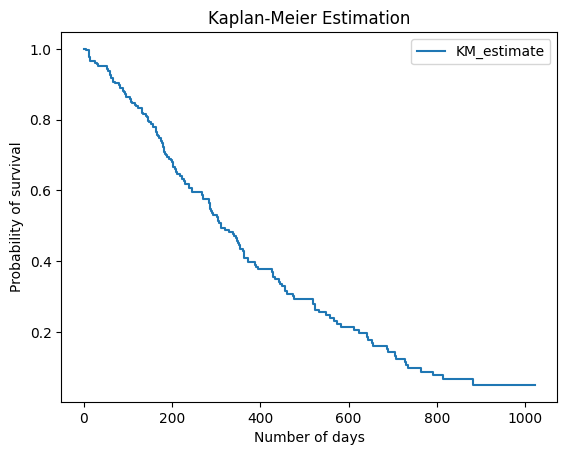

In [42]:
# Plotting the event observed against the timeframe of reference
import matplotlib.pyplot as plt
import seaborn as sns
kmf.plot(ci_show=False)
plt.title("Kaplan-Meier Estimation")
plt.xlabel("Number of days")
plt.ylabel("Probability of survival");

In [43]:
# looking at the median number of survival days i.e., the number of days, on an average, 50% of the patients survived.
print("The median survival time:", kmf.median_survival_time_, "days.")

The median survival time: 310.0 days.


In [44]:
kmf.confidence_interval_survival_function_

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,1.000000,1.000000
5.0,0.969277,0.999381
11.0,0.953935,0.993379
12.0,0.948120,0.990813
13.0,0.936682,0.985244
...,...,...
840.0,0.030728,0.123060
883.0,0.017866,0.108662
965.0,0.017866,0.108662
1010.0,0.017866,0.108662


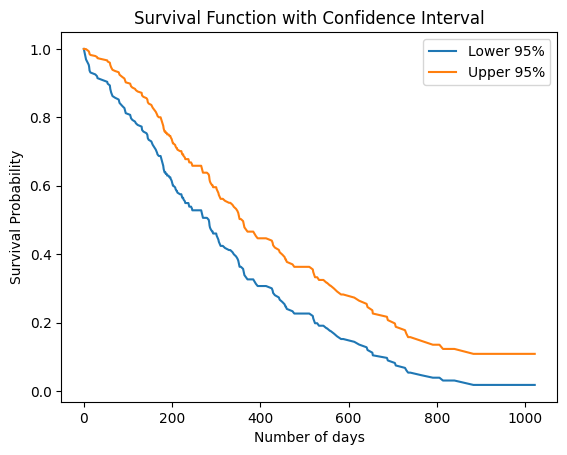

In [45]:
#Plotting the graph for survival probability with confidence interval
confidence_surv_func = kmf.confidence_interval_survival_function_

plt.plot(confidence_surv_func["KM_estimate_lower_0.95"], label = "Lower 95%")
plt.plot(confidence_surv_func["KM_estimate_upper_0.95"], label = "Upper 95%")
plt.title("Survival Function with Confidence Interval")
plt.xlabel("Number of days")
plt.ylabel("Survival Probability")
plt.legend();


In [46]:
event_tab

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,228,228
5.0,1,1,0,0,228
11.0,3,3,0,0,227
12.0,1,1,0,0,224
13.0,2,2,0,0,223
...,...,...,...,...,...
840.0,1,0,1,0,5
883.0,1,1,0,0,4
965.0,1,0,1,0,3


In [47]:
# finally the cumulative density:
kmf.cumulative_density_

,KM_estimate
timeline,
0.0,0.000000
5.0,0.004386
11.0,0.017544
12.0,0.021930
13.0,0.030702
...,...
840.0,0.932873
883.0,0.949654
965.0,0.949654


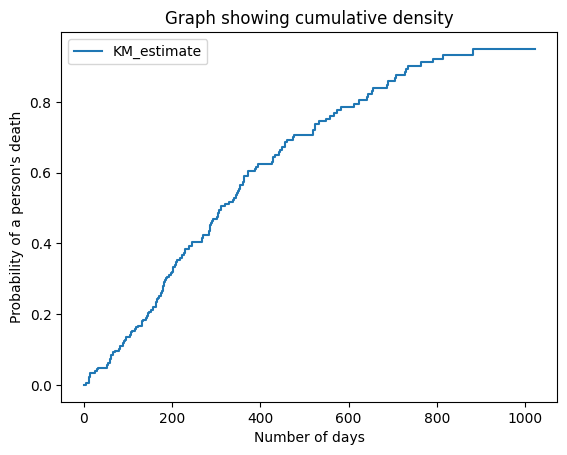

In [48]:
# plotting the graph for the cumulative density:
kmf.plot_cumulative_density(ci_show=False)
plt.title("Graph showing cumulative density")
plt.xlabel("Number of days")
plt.ylabel("Probability of a person's death");

In [49]:
#Plotting the graph for cumulative density with a confidence interval
confidence_cumulative_density = kmf.confidence_interval_cumulative_density_
confidence_cumulative_density

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,0.000000,0.000000
5.0,0.030723,0.000619
11.0,0.046065,0.006621
12.0,0.051880,0.009187
13.0,0.063318,0.014756
...,...,...
840.0,0.969272,0.876940
883.0,0.982134,0.891338
965.0,0.982134,0.891338
1010.0,0.982134,0.891338


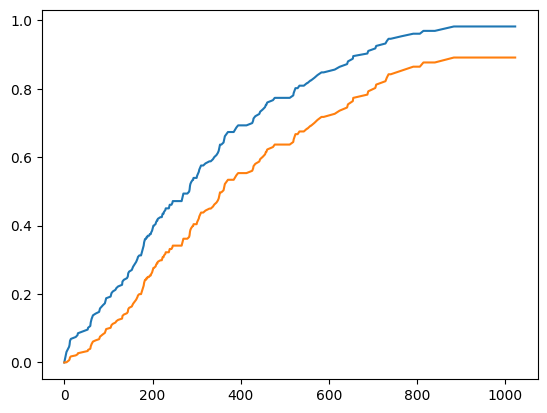

In [51]:
plt.plot(confidence_cumulative_density["KM_estimate_lower_0.95"], label = "Lower 95%")
plt.plot(confidence_cumulative_density["KM_estimate_upper_0.95"], label = "Upper 95%");

In [52]:
# Calculating the conditional median time to the event

kmf.conditional_time_to_event_

,KM_estimate - Conditional median duration remaining to event
timeline,
0.0,310.0
5.0,305.0
11.0,309.0
12.0,308.0
13.0,316.0
...,...
840.0,inf
883.0,inf
965.0,inf


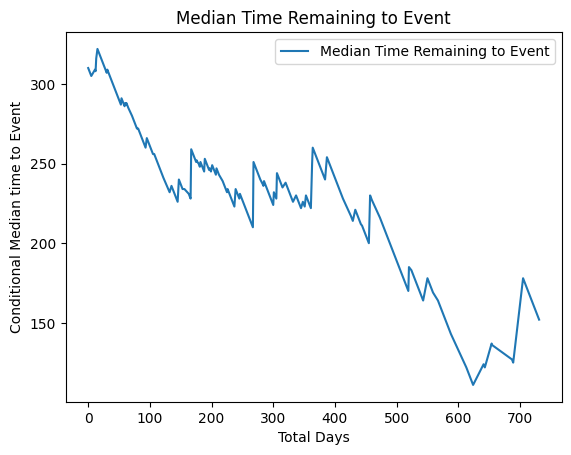

In [53]:
# Conditional median time left for event:

median_time_to_event = kmf.conditional_time_to_event_

plt.plot(median_time_to_event, label = "Median Time Remaining to Event")
plt.title("Median Time Remaining to Event")
plt.xlabel("Total Days")
plt.ylabel("Conditional Median time to Event")
plt.legend();

In [54]:
# import the Nelson Aalen hazard model
from lifelines import NelsonAalenFitter

In [55]:
# object for NelsonAalenFitter

naf = NelsonAalenFitter()

In [56]:
# Fitting the data

naf.fit(df['time'], event_observed=df['dead'])

<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 228 total observations, 63 right-censored observations>

In [57]:
# finding the cumulative hazard:
naf.cumulative_hazard_

,NA_estimate
timeline,
0.0,0.000000
5.0,0.004386
11.0,0.017660
12.0,0.022125
13.0,0.031114
...,...
840.0,2.641565
883.0,2.891565
965.0,2.891565


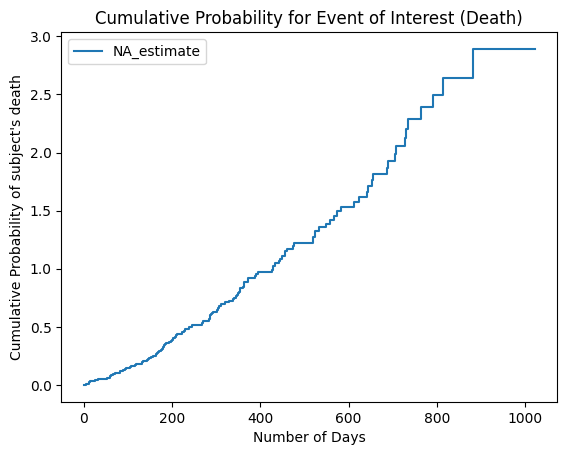

In [58]:
# plotting the cumulative hazard graph

naf.plot_cumulative_hazard(ci_show=False)
plt.title("Cumulative Probability for Event of Interest (Death)")
plt.xlabel("Number of Days")
plt.ylabel("Cumulative Probability of subject's death");

In [59]:
# creating a separate of the actual dataframe for this phase of analysis
df2 = df.copy()

In [60]:
df2 = df2.rename(columns={'meal.cal': 'meal_cal', 'wt.loss': 'wt_loss', 'ph.karno': 'ph_karno', 'ph.ecog': 'ph_ecog', 'pat.karno': 'pat_karno'})

In [61]:
# creating 2 objects for the two groups:

kmf_males = KaplanMeierFitter()
kmf_females = KaplanMeierFitter()

In [62]:
# dividing the data into groups:

males = df2.query("sex == 1")
females = df2.query("sex == 2")

In [63]:
# fitting the data into the models. 

kmf_males.fit(durations= males['time'], event_observed= males['dead'], label= "Males")
kmf_females.fit(durations= females['time'], event_observed= females['dead'], label= "Females")

<lifelines.KaplanMeierFitter:"Females", fitted with 90 total observations, 37 right-censored observations>

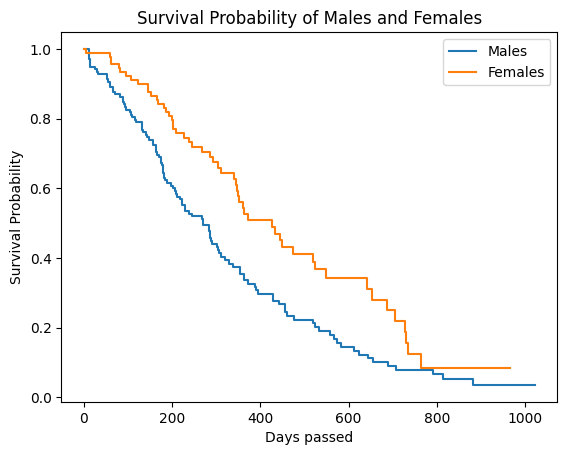

In [64]:
# plotting the graph for the two groups:

kmf_males.plot(ci_show = False)
kmf_females.plot(ci_show = False)

plt.xlabel("Days passed")
plt.ylabel("Survival Probability")
plt.title("Survival Probability of Males and Females");

In [65]:
# dividing the age into different categories : 1 -> greater than 70 and 0 -> lesser than 70
df_age_cats = df2.copy()

df_age_cats.loc[df_age_cats['age'] >= 70, 'age_cat'] = 1
df_age_cats.loc[df_age_cats['age'] < 70, 'age_cat'] = 0

In [66]:
df_age_cats.head(2)

,time,status,age,sex,ph_ecog,ph_karno,pat_karno,meal_cal,wt_loss,dead,age_cat
0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN,1.0,1.0
1,455,2,68,1,0.0,90.0,90.0,1225.0,15.0,1.0,0.0


In [67]:
# dividing the data into groups:

old = df_age_cats.query("age_cat == 1")
young = df_age_cats.query("age_cat == 0")
# creating kmf objects for the two groups and fitting the categorized data

kmf_old = KaplanMeierFitter()
kmf_young = KaplanMeierFitter()

kmf_old.fit(durations= old['time'], event_observed= old['dead'], label= "More than 70 years")
kmf_young.fit(durations= young['time'], event_observed= young['dead'], label= "Less than 70 years")


<lifelines.KaplanMeierFitter:"Less than 70 years", fitted with 172 total observations, 53 right-censored observations>

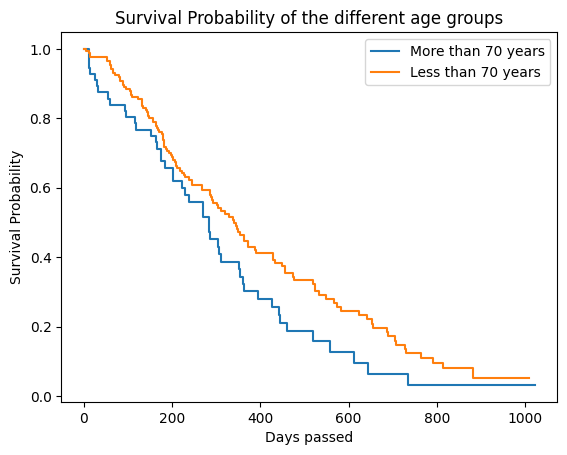

In [68]:
# plotting the graph for the two groups:

kmf_old.plot(ci_show = False)
kmf_young.plot(ci_show = False)

plt.xlabel("Days passed")
plt.ylabel("Survival Probability")
plt.title("Survival Probability of the different age groups");

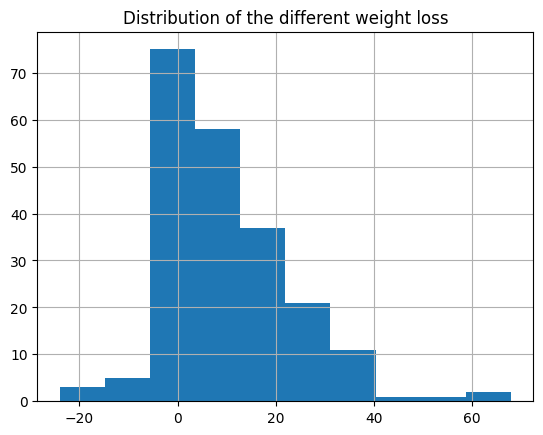

In [69]:
# finding the average meal calories and plotting a historgram for reference
df_wt_loss = df2.copy()

df_wt_loss['wt_loss'].hist()
plt.title("Distribution of the different weight loss");

In [70]:
print("The mean weight loss: ", df_wt_loss['wt_loss'].mean())

The mean weight loss:  9.83177570093458


In [71]:
# dividing the age into 2 categories : 
# 1 -> people who were having a weight loss more than the average weight loss
# 0 -> people who were having a below average weight loss.

df_wt_loss.loc[df_wt_loss['wt_loss'] > 9.83177570093458, 'wt_loss_cat'] = 1
df_wt_loss.loc[df_wt_loss['wt_loss'] <= 9.83177570093458, 'wt_loss_cat'] = 0

In [72]:
# dividing the data into groups:

above_avg_wt_loss = df_wt_loss.query("wt_loss_cat == 1")
below_avg_wt_loss = df_wt_loss.query("wt_loss_cat == 0")

In [73]:
# creating kmf objects for the two groups and fitting the categorized data

kmf_above_avg_wt_loss = KaplanMeierFitter()
kmf_below_avg_wt_loss = KaplanMeierFitter()

kmf_above_avg_wt_loss.fit(durations = above_avg_wt_loss['time'], event_observed = above_avg_wt_loss['dead'], label= "Above average weight loss")
kmf_below_avg_wt_loss.fit(durations = below_avg_wt_loss['time'], event_observed = below_avg_wt_loss['dead'], label= "Below average weight loss")

<lifelines.KaplanMeierFitter:"Below average weight loss", fitted with 121 total observations, 42 right-censored observations>

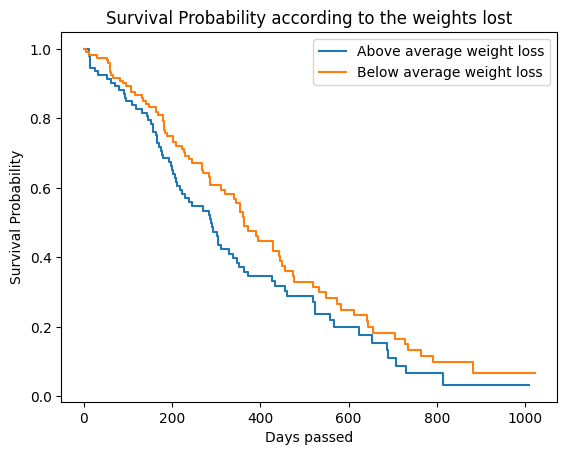

In [74]:
# plotting the graph for the two groups:

kmf_above_avg_wt_loss.plot(ci_show = False)
kmf_below_avg_wt_loss.plot(ci_show = False)

plt.xlabel("Days passed")
plt.ylabel("Survival Probability")
plt.title("Survival Probability according to the weights lost");

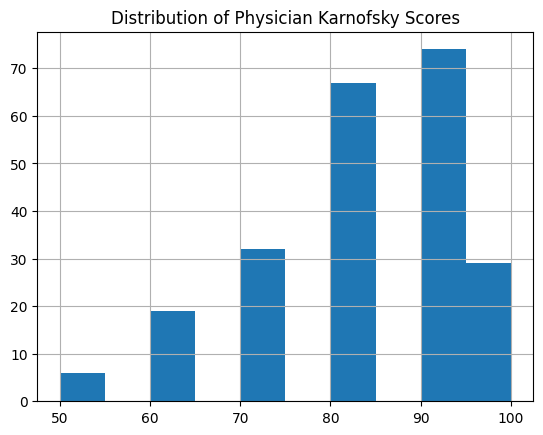

In [75]:
df2['ph_karno'].hist();
plt.title("Distribution of Physician Karnofsky Scores");

In [76]:
# dividing the age into 2 categories : 
# 1 -> people who have a ph.karno >= 80 -- healthy
# 0 -> people who have a ph.karno < 80 -- sick
df_pat_karno = df2.copy()

df_pat_karno.loc[df_pat_karno['pat_karno'] >= 80, 'pat_karno_cat'] = 1
df_pat_karno.loc[df_pat_karno['pat_karno'] < 80, 'pat_karno_cat'] = 0

In [77]:
# dividing the data into groups:

pat_karno_healthy = df_pat_karno.query("pat_karno_cat == 1")
pat_karno_sick = df_pat_karno.query("pat_karno_cat == 0")

In [78]:
# creating kmf objects for the two groups and fitting the categorized data

kmf_pat_karno_healthy = KaplanMeierFitter()
kmf_pat_karno_sick = KaplanMeierFitter()


kmf_pat_karno_healthy.fit(durations = pat_karno_healthy['time'], event_observed = pat_karno_healthy['dead'], label= "Pat-Karno greater than 80 (Healthy)")
kmf_pat_karno_sick.fit(durations = pat_karno_sick['time'], event_observed = pat_karno_sick['dead'], label= "Pat-Karno less than 80 (Sick)")

<lifelines.KaplanMeierFitter:"Pat-Karno less than 80 (Sick)", fitted with 79 total observations, 15 right-censored observations>

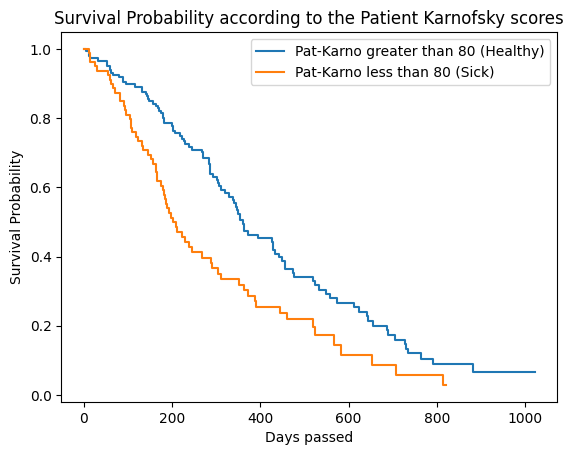

In [79]:
# plotting the graph for the two groups:

kmf_pat_karno_healthy.plot(ci_show = False)
kmf_pat_karno_sick.plot(ci_show = False)

plt.xlabel("Days passed")
plt.ylabel("Survival Probability")
plt.title("Survival Probability according to the Patient Karnofsky scores");

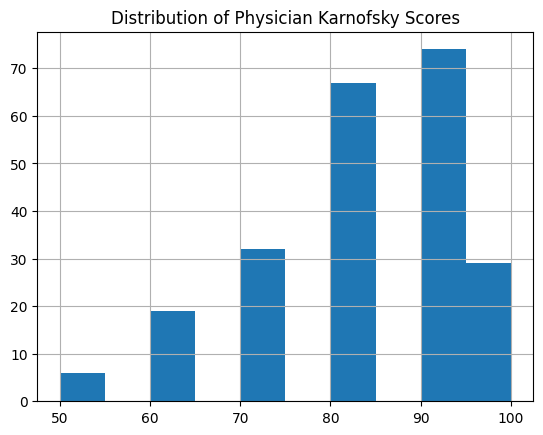

In [80]:
df2['ph_karno'].hist();
plt.title("Distribution of Physician Karnofsky Scores");

In [81]:
# dividing the age into 2 categories : 
# 1 -> people who have a ph.karno >= 80 -- healthy
# 0 -> people who have a ph.karno < 80 -- sick
df_ph_karno = df2.copy()

df_ph_karno.loc[df_ph_karno['ph_karno'] >= 80, 'ph_karno_cat'] = 1
df_ph_karno.loc[df_ph_karno['ph_karno'] < 80, 'ph_karno_cat'] = 0

In [82]:
# dividing the data into groups:

ph_karno_healthy = df_ph_karno.query("ph_karno_cat == 1")
ph_karno_sick = df_ph_karno.query("ph_karno_cat == 0")

In [83]:
# creating kmf objects for the two groups and fitting the categorized data

kmf_ph_karno_healthy = KaplanMeierFitter()
kmf_ph_karno_sick = KaplanMeierFitter()

kmf_ph_karno_healthy.fit(durations = ph_karno_healthy['time'], event_observed = ph_karno_healthy['dead'], label= "Ph-Karno greater than 80 (Healthy)")
kmf_ph_karno_sick.fit(durations = ph_karno_sick['time'], event_observed = ph_karno_sick['dead'], label= "Ph-Karno less than 80 (Sick)")

<lifelines.KaplanMeierFitter:"Ph-Karno less than 80 (Sick)", fitted with 57 total observations, 7 right-censored observations>

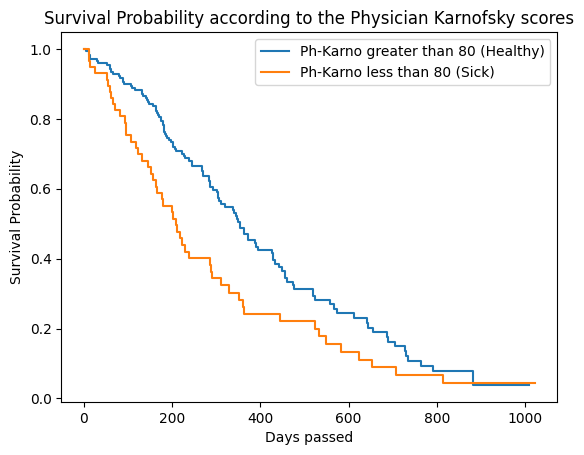

In [84]:
# plotting the graph for the two groups:

kmf_ph_karno_healthy.plot(ci_show = False)
kmf_ph_karno_sick.plot(ci_show = False)

plt.xlabel("Days passed")
plt.ylabel("Survival Probability")
plt.title("Survival Probability according to the Physician Karnofsky scores");

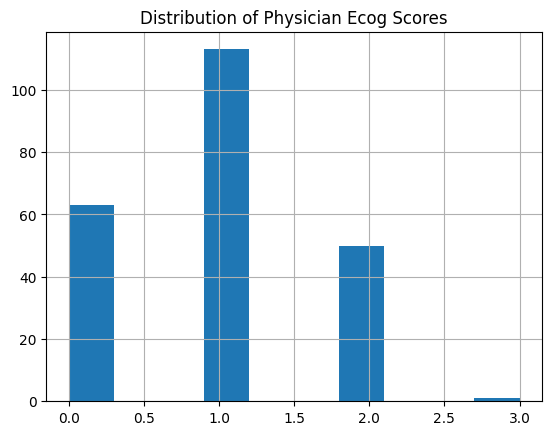

In [85]:
df2['ph_ecog'].hist()
plt.title("Distribution of Physician Ecog Scores");

In [86]:
# dividing the age into 2 categories : 
# 1 -> people who have a ph.ecog <= 1 -- healthy
# 0 -> people who have a ph.karno > 1 -- sick
df_ph_ecog = df2.copy()

df_ph_ecog.loc[df_ph_ecog['ph_ecog'] <= 1, 'ph_ecog_cat'] = 1
df_ph_ecog.loc[df_ph_ecog['ph_ecog'] > 1, 'ph_ecog_cat'] = 0

In [87]:
# dividing the data into groups:

ph_ecog_health = df_ph_ecog.query("ph_ecog_cat == 1")
ph_ecog_sick = df_ph_ecog.query("ph_ecog_cat == 0")
# creating kmf objects for the two groups and fitting the categorized data

kmf_ph_ecog_healthy = KaplanMeierFitter()
kmf_ph_ecog_sick = KaplanMeierFitter()

kmf_ph_ecog_healthy.fit(durations = ph_ecog_health['time'], event_observed = ph_ecog_health['dead'], label= "Ph-Ecog lesser than 1 (Healthy)")
kmf_ph_ecog_sick.fit(durations = ph_ecog_sick['time'], event_observed = ph_ecog_sick['dead'], label= "Ph-Ecog greater than 1 (Sick)")


<lifelines.KaplanMeierFitter:"Ph-Ecog greater than 1 (Sick)", fitted with 51 total observations, 6 right-censored observations>

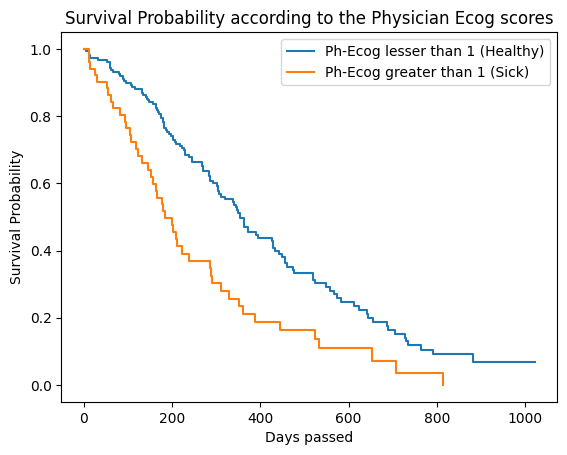

In [88]:
# plotting the graph for the two groups:

kmf_ph_ecog_healthy.plot(ci_show = False)
kmf_ph_ecog_sick.plot(ci_show = False)

plt.xlabel("Days passed")
plt.ylabel("Survival Probability")
plt.title("Survival Probability according to the Physician Ecog scores");

In [89]:
# looking at the null values:
df.isnull().sum()

time          0
status        0
age           0
sex           0
ph.ecog       1
ph.karno      1
pat.karno     3
meal.cal     47
wt.loss      14
dead          0
dtype: int64

In [90]:
# running a base analysis first by removing all the null values without any imputation

# temporary copy of the original dataframe
df_cph = df.copy()


dropper_subset = list(df_cph.columns)
df_cph.dropna(subset=dropper_subset, inplace=True)
df_cph.drop(['status'], axis=1, inplace=True) # dropping the status column also as the dead column is sufficient

In [91]:
# sanity check on whether all null values were dropped
df_cph.isnull().sum()

time         0
age          0
sex          0
ph.ecog      0
ph.karno     0
pat.karno    0
meal.cal     0
wt.loss      0
dead         0
dtype: int64

In [92]:
# creating a cox-ph object and fitting the data to observe the summary
from lifelines import CoxPHFitter

In [93]:
cph = CoxPHFitter()
cph.fit(df_cph, 'time', event_col = 'dead')

<lifelines.CoxPHFitter: fitted with 168 total observations, 47 right-censored observations>

In [94]:
# Checking whether the assumptions for the cox-ph model is alright.
cph.check_assumptions(df_cph)

Proportional hazard assumption looks okay.


[]

In [95]:
df_cph.tail(50)

,time,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,dead
162,292,69,1,2.0,60.0,70.0,2450.0,36.0,0.0
163,142,63,1,1.0,90.0,80.0,875.0,2.0,1.0
164,413,64,1,1.0,80.0,70.0,413.0,16.0,0.0
165,266,57,2,0.0,90.0,90.0,1075.0,3.0,0.0
167,320,46,1,0.0,100.0,100.0,860.0,4.0,1.0
168,181,61,1,1.0,90.0,90.0,730.0,0.0,1.0
169,285,65,1,0.0,100.0,90.0,1025.0,0.0,1.0
170,301,61,1,1.0,90.0,100.0,825.0,2.0,0.0
171,348,58,2,0.0,90.0,80.0,1225.0,10.0,1.0
172,197,56,1,1.0,90.0,60.0,768.0,37.0,1.0


In [96]:
# selecting 3 values from the actual observations

df_checker = df_cph.iloc[7:10, :]
df_checker

,time,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,dead
10,170,57,1,1.0,80.0,80.0,1025.0,27.0,1.0
14,567,57,1,1.0,80.0,70.0,2600.0,60.0,1.0
16,613,70,1,1.0,90.0,100.0,1150.0,-5.0,1.0


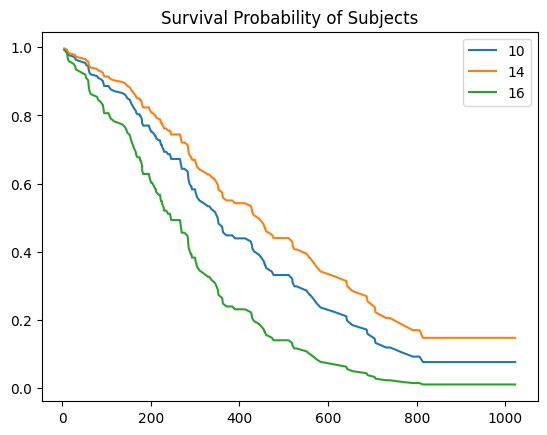

In [97]:
cph.predict_survival_function(df_checker).plot()
plt.title("Survival Probability of Subjects");